In [87]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
yelp_path = ("../__DATA__/sentiment labelled sentences/yelp_labelled.txt")
amz_path = ("../__DATA__/sentiment labelled sentences/amazon_cells_labelled.txt")
imdb_path = ("../__DATA__/sentiment labelled sentences/imdb_labelled.txt")
#f = open(data_path)
amzraw = pd.read_csv(amz_path, delimiter='\t',header=None)
amzraw.columns = ['sentence','positivity']
amzraw.head()

,sentence,positivity
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [153]:
punctuation

['.', '!', '?', ',']

In [173]:
punctuation = ['.','!','?',',']
for p in punctuation:
    df2=amzraw['sentence'].str.replace(p,' ')
    df2=pd.DataFrame(df2)
    amzraw['sentence'] = df2
amzraw.shape

(1000, 2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [175]:
keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'waste','disappoint','junk','not', 'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow']
amzfeats = pd.DataFrame(amzraw['positivity'])
for key in keys:
    amzfeats[str(key)] = amzraw.sentence.str.contains(str(key), case=False)

#setting data
data = amzfeats[keys]
target = amzfeats['positivity']

#testing classifier
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 215


In [177]:
#Filter out negative reviews
#amzraw[amzraw['positivity'] == 1]['sentence']

In [146]:
amzraw['sentence'][956]

'Just reading on the specs alone makes you say WOW '

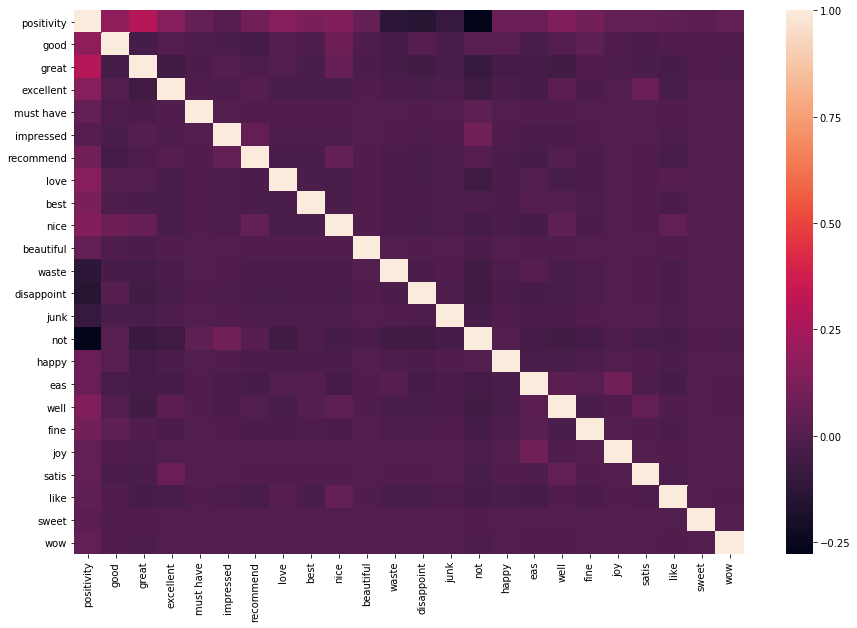

In [176]:
plt.figure(figsize=(15,10))
sns.heatmap(amzfeats.corr())

In [193]:
def revclasseval(path):
    raw = pd.read_csv(path, delimiter='\t',header=None)
    raw.columns = ['sentence','positivity']
    
    punctuation = ['.','!','?',',']
    for p in punctuation:
        df2=raw['sentence'].str.replace(p,' ')
        df2=pd.DataFrame(df2)
        raw['sentence'] = df2
        
    keys = ['good','great','excellent','must have','impressed','recommend','love','best', 'nice', 'beautiful',
        'waste','disappoint','junk','not', 'happy', 'eas', 'well','fine','joy', 'satis', 'like', 'sweet', 'wow']
    
    feats = pd.DataFrame(raw['positivity'])
    for key in keys:
        feats[str(key)] = raw.sentence.str.contains(str(key), case=False)

    #setting data
    data = feats[keys]
    target = feats['positivity']

    #testing classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

In [194]:
revclasseval(yelp_path)

Number of mislabeled points out of a total 1000 points : 300


In [195]:
revclasseval(imdb_path)

Number of mislabeled points out of a total 748 points : 261


In [196]:
revclasseval(amz_path)

Number of mislabeled points out of a total 1000 points : 215
